### import libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

import nltk
from nltk.text import Text

import string

In [4]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\obaid\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\obaid\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### Reading the Data

In [6]:
df = pd.read_csv('Datasets/train_E6oV3lV.csv')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [8]:
df.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

In [9]:
df.dtypes

id        int64
label     int64
tweet    object
dtype: object

In [10]:
df

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


In [11]:
df[df['label'] == 1]['tweet']

13       @user #cnn calls #michigan middle school 'buil...
14       no comment!  in #australia   #opkillingbay #se...
17                                  retweet if you agree! 
23         @user @user lumpy says i am a . prove it lumpy.
34       it's unbelievable that in the 21st century we'...
                               ...                        
31934    lady banned from kentucky mall. @user  #jcpenn...
31946    @user omfg i'm offended! i'm a  mailbox and i'...
31947    @user @user you don't have the balls to hashta...
31948     makes you ask yourself, who am i? then am i a...
31960    @user #sikh #temple vandalised in in #calgary,...
Name: tweet, Length: 2242, dtype: object

### Cleaning Data
> <b> Removing tags </b>

> <b> Removing Hashtags </b>

> <b> Removing links </b>

> <b> Convert to lowercase </b>

## Remove Tags
> using regex  we can easly remove the tags from tweet text

In [14]:
def remove_tags(text):
    return re.sub(r'@\w+','',text) ## this removes any words that start with @
  
    
## now lets apply it to tweet column
df['tweet'] = df['tweet'].apply(remove_tags)

## Remove Hashtags

In [16]:
def remove_Hashtags(text):
    return re.sub(r'#\w+','',text) ## this removes any word that start with #

## applying tweets on remove_hashtags
df['tweet'] = df['tweet'].apply(remove_Hashtags)

In [17]:
df['tweet']

0          when a father is dysfunctional and is so sel...
1          thanks for  credit i can't use cause they do...
2                                      bihday your majesty
3           i love u take with u all the time in urð±...
4                              factsguide: society now    
                               ...                        
31957    ate  isz that youuu?ððððððð...
31958      to see nina turner on the airwaves trying to...
31959    listening to sad songs on a monday morning otw...
31960                  vandalised in in ,  condemns  act  
31961                          thank you  for you follow  
Name: tweet, Length: 31962, dtype: object

## Remove punctuation and Urls

In [19]:
def remove_punct(text):
    return text.translate(str.maketrans('','',string.punctuation)) ## this removes any punctuations and any urls

df['tweet'] = df['tweet'].apply(remove_punct)

In [20]:
df

,id,label,tweet
0,1,0,when a father is dysfunctional and is so sel...
1,2,0,thanks for credit i cant use cause they don...
2,3,0,bihday your majesty
3,4,0,i love u take with u all the time in urð±...
4,5,0,factsguide society now
...,...,...,...
31957,31958,0,ate isz that youuuððððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,vandalised in in condemns act


## Remove emojies and unusual symbols

In [22]:
def remove_unusual(text):
    return re.sub(r'[^\x00-\x7F]+', '', text)

df['tweet'] = df['tweet'].apply(remove_unusual)

In [23]:
df

,id,label,tweet
0,1,0,when a father is dysfunctional and is so sel...
1,2,0,thanks for credit i cant use cause they don...
2,3,0,bihday your majesty
3,4,0,i love u take with u all the time in ur
4,5,0,factsguide society now
...,...,...,...
31957,31958,0,ate isz that youuu
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,vandalised in in condemns act


## Lower Case

In [25]:
def lower_case(text):
    return text.lower()

df['tweet'] = df['tweet'].apply(lower_case)

In [26]:
df

,id,label,tweet
0,1,0,when a father is dysfunctional and is so sel...
1,2,0,thanks for credit i cant use cause they don...
2,3,0,bihday your majesty
3,4,0,i love u take with u all the time in ur
4,5,0,factsguide society now
...,...,...,...
31957,31958,0,ate isz that youuu
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,vandalised in in condemns act


In [27]:
df[df['label'] == 1]

,id,label,tweet
13,14,1,calls middle school build the wall chant
14,15,1,no comment in
17,18,1,retweet if you agree
23,24,1,lumpy says i am a prove it lumpy
34,35,1,its unbelievable that in the 21st century wed ...
...,...,...,...
31934,31935,1,lady banned from kentucky mall
31946,31947,1,omfg im offended im a mailbox and im proud
31947,31948,1,you dont have the balls to hashtag me as a ...
31948,31949,1,makes you ask yourself who am i then am i any...


### visalize the label class

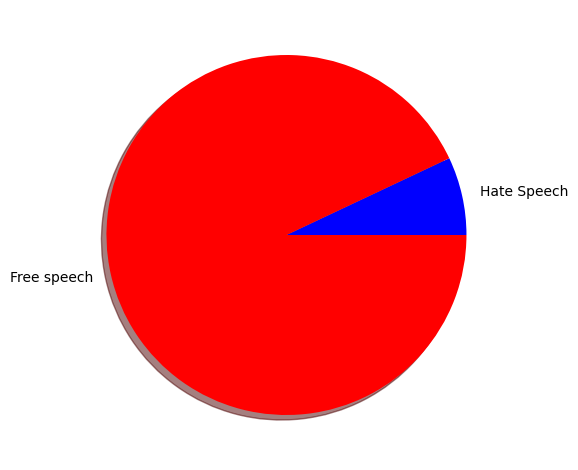

In [29]:
hate_speech = df[df['label']==1].shape[0]
free_speech = df[df['label']==0].shape[0]

speech = [hate_speech, free_speech]
label = ['Hate Speech','Free speech']

plt.pie(speech,labels=label,shadow=True,colors=['blue','red'])
plt.tight_layout()
plt.show()

## Preprocesing Operations

> <b> Tokenizing
  
>  <b> Removing stop words
  
>  <b> Lemmatization
  
>  <b> WordCloud

#### Tokenizing

In [33]:
from nltk.tokenize import sent_tokenize, word_tokenize

In [34]:
def tokenize(text):
    text = word_tokenize(text)
    return text

df['tweet'] = df['tweet'].apply(tokenize)

In [35]:
df.head()

,id,label,tweet
0,1,0,"[when, a, father, is, dysfunctional, and, is, ..."
1,2,0,"[thanks, for, credit, i, cant, use, cause, the..."
2,3,0,"[bihday, your, majesty]"
3,4,0,"[i, love, u, take, with, u, all, the, time, in..."
4,5,0,"[factsguide, society, now]"


#### Removing Stop words

In [37]:
from nltk.corpus import stopwords

In [38]:
#def remove_stopwords(text):
   # text = [i for i in text if not i in stopwords.words('english')]
   # return text
#df['tweet'] = df['tweet'].apply(remove_stopwords)

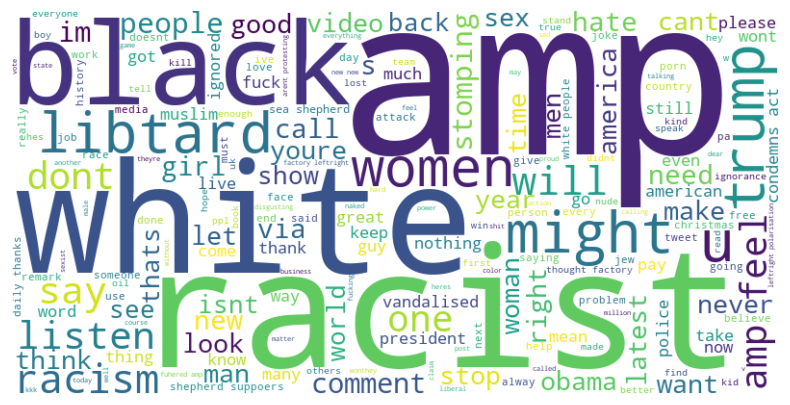

In [39]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Filter rows where label is 1 and join each list of tokens back into a single string per row
joined_text = df[df['label'] == 1]['tweet'].apply(lambda x: ' '.join(x))

# Combine all the rows into a single text
all_text = ' '.join(joined_text)

# Define stop words
stopwords = set(STOPWORDS)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords).generate(all_text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()



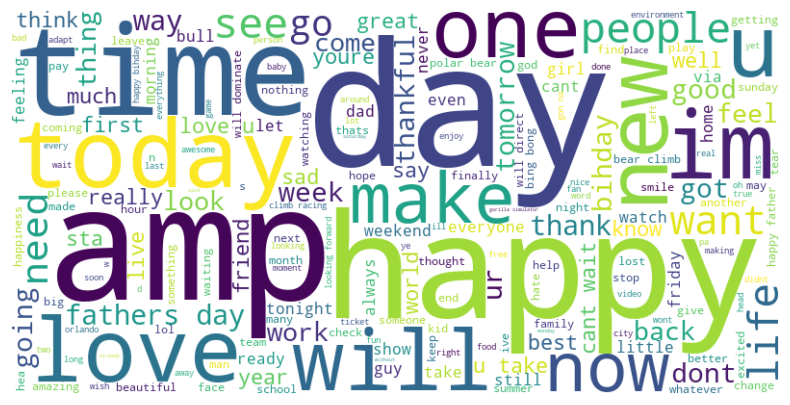

In [40]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Filter rows where label is 1 and join each list of tokens back into a single string per row
joined_text = df[df['label'] == 0]['tweet'].apply(lambda x: ' '.join(x))

# Combine all the rows into a single text
all_text = ' '.join(joined_text)

# Define stop words
stopwords = set(STOPWORDS)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords).generate(all_text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


## Feature Extraction

> <b>TI-IDF Model

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [44]:
vectorizer = TfidfVectorizer()

In [45]:
list_str = []
for lists in df['tweet']:
    list_str.append(' '.join(map(str, lists)))

df['tweet'] = list_str

In [46]:
corpus = df['tweet']
text = vectorizer.fit_transform(corpus).toarray()
text.shape

(31962, 24028)

## Model Training

#### import needed packiges

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
# Transformers and PyTorch
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments
import torch

## Auto Tokenizing

In [51]:
from transformers import AutoTokenizer
df = pd.read_csv('Datasets/train_E6oV3lV.csv')
# Select a pre-trained transformer model
model_name = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)

# Tokenize the 'tweet' column
# Hugging Face expects raw text rather than manually tokenized data
texts = df['tweet'].tolist()

# Tokenize the text using the tokenizer
# This method automatically handles tokenization, padding, and truncation
encoding = tokenizer(texts, truncation=True, padding=True, max_length=128, return_tensors='pt')

# Labels (assuming you have a 'label' column in your DataFrame for binary classification)
labels = df['label'].tolist()
labels = torch.tensor(labels)


C:\Users\obaid\anaconda3\Lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


## Prepare Data Loaders

In [53]:
from torch.utils.data import Dataset, DataLoader

class HateSpeechDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = self.labels[idx]
        return item

# Create a dataset
dataset = HateSpeechDataset(encoding, labels)

# Split the dataset into training and validation sets
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = torch.utils.data.random_split(dataset, [train_size, val_size])

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)


## Load the Model and Set Up Training Arguments

In [107]:
# Load the pre-trained model for sequence classification
model_name = "prajjwal1/bert-tiny"  # A smaller BERT variant
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=2)


# Set training arguments
training_args = TrainingArguments(
    output_dir='./results',          # Output directory
    eval_strategy="epoch",           # Evaluate after each epoch
    per_device_train_batch_size=16,  # Batch size for training
    per_device_eval_batch_size=16,   # Batch size for evaluation
    num_train_epochs=3,              # Number of training epochs
    weight_decay=0.01,               # Strength of weight decay
    logging_dir='./logs',            # Directory for storing logs
    logging_steps=10,                # Log every 10 steps
    save_strategy="epoch"            # Save the model after every epoch
)


config.json:   0%|          | 0.00/285 [00:00<?, ?B/s]

C:\Users\obaid\anaconda3\Lib\site-packages\huggingface_hub\file_download.py:159: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\obaid\.cache\huggingface\hub\models--prajjwal1--bert-tiny. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


pytorch_model.bin:   0%|          | 0.00/17.8M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at prajjwal1/bert-tiny and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


## Train the Model

In [116]:
# Make the model's state dict tensors contiguous before saving
def make_model_contiguous(model):
    for param in model.parameters():
        if not param.is_contiguous():
            param.data = param.contiguous()

# Call the function to make sure tensors are contiguous
make_model_contiguous(model)

# Now save the model safely
model.save_pretrained('./results')
tokenizer.save_pretrained('./results')



('./results\\tokenizer_config.json',
 './results\\special_tokens_map.json',
 './results\\vocab.txt',
 './results\\added_tokens.json',
 './results\\tokenizer.json')

In [118]:
# Initialize the Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    tokenizer=tokenizer,
    compute_metrics=lambda p: {'accuracy': (p.predictions.argmax(-1) == p.label_ids).mean()}  # Simple accuracy metric
)

# Train the model
trainer.train()


C:\Users\obaid\AppData\Local\Temp\ipykernel_16632\3866470372.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


Epoch,Training Loss,Validation Loss,Accuracy
1,0.068800,0.166042,0.957610
2,0.056900,0.155619,0.959643
3,0.089400,0.164247,0.959643


C:\Users\obaid\AppData\Local\Temp\ipykernel_16632\3866470372.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
C:\Users\obaid\AppData\Local\Temp\ipykernel_16632\3866470372.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
C:\Users\obaid\AppData\Local\Temp\ipykernel_16632\3866470372.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val i

TrainOutput(global_step=4797, training_loss=0.0793139126496605, metrics={'train_runtime': 479.6836, 'train_samples_per_second': 159.912, 'train_steps_per_second': 10.0, 'total_flos': 24363812344320.0, 'train_loss': 0.0793139126496605, 'epoch': 3.0})

## Prediction

In [149]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

# Load the tokenizer and model
tokenizer = AutoTokenizer.from_pretrained('prajjwal1/bert-tiny')
model = AutoModelForSequenceClassification.from_pretrained('./results')

# Example text data
texts = ["awsome ", "I like it"]

# Tokenize the input texts
inputs = tokenizer(texts, truncation=True, padding=True, max_length=128, return_tensors='pt')

# Make predictions
model.eval()
with torch.no_grad():
    outputs = model(**inputs)
    predictions = torch.argmax(outputs.logits, dim=-1)

# Print predictions
for text, prediction in zip(texts, predictions.tolist()):
    print(f"Text: '{text}' -> Predicted label: {prediction}")


Text: 'awsome ' -> Predicted label: 0
Text: 'I like it' -> Predicted label: 0


C:\Users\obaid\anaconda3\Lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
